In [18]:
# We use torch and sklearn only on steps of fitting data
import torch
from tqdm import tqdm
from scipy.optimize import linprog
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2: Separating hyperplanes and the Perceptron Learning Algorithm (3pts)
### <div align="right"> &copy; Yurii Yeliseev & Rostyslav Hryniv, 2022 </div>

## Completed by:   
*   First team member
*   Second team member


#### The aim of this task is to discuss a simple binary classification method for linearly separated classes. The Perceptron Learning Algorithm finds a ***separating hyperplane*** in finitely many steps and is based on a clear geometric update method. We will derive the upper bound on the number of iterations in PLA and implement it for digit classification for the MNIST database.

## 1. Separating hyperplanes and classification (0.9 pts)

### 1.1. Binary classification.    
A typical task of binary classification reads as follows. We are given the set of labelled (training) data $(\mathbf{x}_k, y_k), k=1,2,\dots, N$, where $\mathbf{x}_k \in \mathbb{R}^d$ gives a data point and the label $y_k = \pm1$ encodes the class (e.g. $y_k=1$ is the <font color='red'>''red''</font> class and $y_k=-1$ is the <font color='blue'>''blue''</font> one). The task is to find a classfier $f \,:\, \mathbb{R}^d \to \pm1$ that would correctly recognize the classes, i.e. satisfy $y_k f(\mathbf{x}_k) >0$ for all (or most) $k=1,2,\dots,N$. This function can then be used to guess the class of new (unseen) data $\mathbf{x}\in\mathbb{R}^n$.



### 1.2. Separating hyperplane  
The simplest case is when the red and blue classes are *linearly separable*, i.e., when there is a hyperplane $H: \mathbf{w} \cdot \mathbf{x} + w_0 = 0$ separating the red and blue datapoints. Then  $f(\mathbf{x}) = \mathbf{w}\cdot \mathbf{x} + w_0$ is an affine classifier, so that $f(\mathbf{x}_k)>0$ for red points and $f(\mathbf{x}_k)<0$ for blue ones. Augmenting $\mathbf{x}$ to $\widehat{\mathbf{x}} := (1, \mathbf{x})$ and $\widehat{\mathbf{w}} = (w_0,\mathbf{w})$, we recognize that $f(\mathbf{x})= \widehat{\mathbf{x}}\cdot \widehat{\mathbf{w}}$. Therefore, the angles between $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$ are acute for red datapoints and obtuse for the blue ones. The task is therefore to find the *normal vector* $\widehat{\mathbf{w}}$ with this properties.

### 1.3. The idea behind the Perceptron learning algorithm (PLA)

To simplify the notations, in what follows we will omit the "hats" above the $(d+1)$-dimensional vectors $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$.

PLA is an iterative algorithm that updates the direction vector ${\mathbf{w}}$ towards a misclassified example, one at a time.

Let's recall that correctly classified vectors $\mathbf{x}_j$ must satisfy the inequality
$$
  y_j ({\mathbf{w}}\cdot {\mathbf{x}}_j) > 0.
$$
If a red $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is obtuse. The idea is that we should decrease the angle between them by updating ${\mathbf{w}}$ to ${\mathbf{w}} + {\mathbf{x}}_j$ (see Figure 1). Likewise, if a blue $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is acute, and we increase it be replacing ${\mathbf{w}}$ with ${\mathbf{w}} - {\mathbf{x}}_j$. In both cases, the update is $${\mathbf{w}} \mapsto {\mathbf{w}} + y_j {\mathbf{x}}_j$$

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <img src="https://drive.google.com/uc?export=view&id=12rduejeedS8NxrxXkSBJkkcDH3lB0k-R">


</body>
</html>

### 1.4. **PLA**

The above considerations suggest the following **PLA**:
1.   Start with ${\mathbf{w}}_0=\mathbf{0}$ and classify the points
2.   Take an arbitrary misclassified point
3.   Update the ${\mathbf{w}}$
4.   Update the classification
5.   Repeat 2-4 until there are misclassified points.


### 1.5. **PLA**: proof of convergence (0.9 pts)


---


#### **1.5.1 (0.3 pts)** Analyze the PLA update step  
Prove that by updating ${\mathbf{w}}$, we are decreasing or increasing (as required) the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$.

---

First, let's consider a misclassified datapoint ${\mathbf{x}}_j$, where the product $y_j ({\mathbf{w}}\cdot {\mathbf{x}}_j)$ is negative. This situation occurs either when $y_j = 1$ and the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is obtuse (greater than 90 degrees), or when $y_j = -1$ and the angle is acute (less than 90 degrees).

In the perceptron algorithm, the weight vector ${\mathbf{w}}$ is updated in the direction of $y_j {\mathbf{x}}_j$:

$${\mathbf{w}}' = {\mathbf{w}} + y_j {\mathbf{x}}_j.$$

If we consider the dot product of ${\mathbf{w}}'$ and ${\mathbf{x}}_j$, we have:

$${\mathbf{w}}'\cdot {\mathbf{x}}_j = ({\mathbf{w}} + y_j {\mathbf{x}}_j)\cdot {\mathbf{x}}_j = {\mathbf{w}}\cdot {\mathbf{x}}_j + y_j {\mathbf{x}}_j\cdot {\mathbf{x}}_j.$$

We note that ${\mathbf{x}}_j\cdot {\mathbf{x}}_j$ is always greater than or equal to zero, as it's equivalent to the square of the length of the vector ${\mathbf{x}}_j$.

When $y_j = 1$, the dot product ${\mathbf{w}}'\cdot {\mathbf{x}}_j$ is larger than ${\mathbf{w}}\cdot {\mathbf{x}}_j$ and when $y_j = -1$, the dot product ${\mathbf{w}}'\cdot {\mathbf{x}}_j$ is smaller than ${\mathbf{w}}\cdot {\mathbf{x}}_j$.

We recall that the dot product of two vectors can be expressed in terms of the cosine of the angle between them as ${\mathbf{u}}\cdot{\mathbf{v}} = ||\mathbf{u}||\hspace{1mm}||\mathbf{v}|| \cos(\theta)$.

Hence, if $y_j = 1$, a larger dot product ${\mathbf{w}}'\cdot {\mathbf{x}}_j$ implies that the cosine of the angle after the update is larger, which in turn means that the angle itself becomes smaller, bringing ${\mathbf{w}}$ closer in alignment to ${\mathbf{x}}_j$. If $y_j = -1$, a smaller dot product ${\mathbf{w}}'\cdot {\mathbf{x}}_j$ implies the cosine of the angle after the update is smaller (more negative), which increases the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$, moving ${\mathbf{w}}$ further away from ${\mathbf{x}}_j$, as needed to correct the misclassification.

Consequently, we can conclude that the update step of the PLA indeed moves the weight vector ${\mathbf{w}}$ as needed to correct the misclassification.

---


#### **Assumptions and notations**

***Assumption on linear separability*** There exists an ${\mathbf{w}^{\star}} \in \mathbb{R}^{d+1}$ of unit length and $\gamma > 0$ such that $$y_k\, {\mathbf{x}}_k\cdot {\mathbf{w}}^{\star} \ge \gamma, \qquad k=1,2,\dots, n.$$ The value $\gamma$ determines the width of the *separating slab* free of any datapoints. The larger $\gamma$, the wider the slab and the more robust the classifier is to noise in data.  

We also denote by $R$ the maximum norm of $\mathbf{x}_k$

***Theorem on PLA convergence.*** The PLA makes at most $\dfrac{R^2}{\gamma^2}$ updates, after which it returns a separating hyperplane.

***Proof.*** Should the algorthm terminate, then the resulting ${\mathbf{w}}$ determines a separating hyperplane. Thus it suffices to show that the algorithm terminates after at most $\frac{R^2}{\gamma^2}$ updates. The approach is to get upper and lower bounds on the norm of the $k^{\mathrm{th}}$ update ${\mathbf{w}}_k$ of the weighting vector ${\mathbf{w}}$, starting with ${\mathbf{w}}_0 = \mathbf{0}$.

Assume that $k\ge 1$ and ${\mathbf{x}}_j$ is a misclasssified point on iteration $k$; then
$$
\begin{aligned}
\mathbf{w}_{k+1} \cdot {\mathbf{w}}^{\star} &=\left({\mathbf{w}}_k + y_j \mathbf{x}_j\right) \cdot {\mathbf{w}}^{\star} \\
&={\mathbf{w}}_k \cdot {\mathbf{w}}^{\star}+y_j\left({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}\right) \\
&>{\mathbf{w}}_k \cdot {\mathbf{w}}^{\star} + \gamma
\end{aligned}
$$

---

#### **1.5.2. (0.3 pts)** Explain by induction that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma$.

---

We will prove by mathematical induction that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} \ge k \gamma$ for all $k \ge 0$.

Base Case:

When $k=0$, we have ${\mathbf{w}}_{0} \cdot {\mathbf{w}}^{\star} = 0$, which is indeed $\ge 0 \cdot \gamma$, thus satisfying our base case.

Inductive Hypothesis:

Assume that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} \ge k \gamma$ holds for some $k \ge 0$.

Inductive Step:

Now we need to show that ${\mathbf{w}}_{k+1} \cdot {\mathbf{w}}^{\star} \ge (k+1) \gamma$.

We know from our update rule that

$${\mathbf{w}}_{k+1} \cdot {\mathbf{w}}^{\star} = {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} + y_j ({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}).$$

Given the margin condition $y_j ({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}) \ge \gamma$ for all $j$, we can write

$${\mathbf{w}}_{k+1} \cdot {\mathbf{w}}^{\star} \ge {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} + \gamma.$$

By substituting our induction hypothesis ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} \ge k \gamma$ into this inequality, we get

$${\mathbf{w}}_{k+1} \cdot {\mathbf{w}}^{\star} \ge k \gamma + \gamma = (k+1) \gamma.$$

Hence, the inequality ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star} \ge k \gamma$ holds for all $k \ge 0$.

---

This proof shows that with every update of the weight vector, the dot product of ${\mathbf{w}}_{k}$ and the optimal weight vector ${\mathbf{w}}^{\star}$ increases by at least $\gamma$, ensuring that ${\mathbf{w}}_{k}$ progressively aligns with ${\mathbf{w}}^{\star}$.

As a result, we see that
$$\|\mathbf{w}_k\| \ge {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma\tag{1}$$

To obtain the upper bound, we argue that
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2 &=\left\|\mathbf{w}_k+y_j \mathbf{x}_j\right\|^2 \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|y_j \mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j
\end{aligned}
$$

---

#### **1.5.3. (0.3 pts)** Derive the lower bound
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2
&\le\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2 \\
&\le\left\|\mathbf{w}_k\right\|^2+R^2
\end{aligned}
$$
and use induction to conclude that
$$
\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2 \tag{2}
$$

---

Let's derive the lower bound for the squared norm of $\mathbf{w}_{k+1}$:

Looking at the equation for $\left\|\mathbf{w}_{k+1}\right\|^2$, we know that the term $2(\mathbf{w}_k \cdot \mathbf{x}_j) y_j$ is negative because $\mathbf{x}_j$ is a misclassified point (so $\mathbf{w}_k \cdot \mathbf{x}_j y_j < 0$). Because we're adding a negative number, it will decrease the value of $\left\|\mathbf{w}_{k+1}\right\|^2$, so:

$$\left\|\mathbf{w}_{k+1}\right\|^2 \le \left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2.$$

Now, the magnitude of $\mathbf{x}_j$ is less than or equal to the maximum distance $R$ from the origin, so $\left\|\mathbf{x}_j\right\|^2 \le R^2$. Therefore:

$$\left\|\mathbf{w}_{k+1}\right\|^2 \le \left\|\mathbf{w}_k\right\|^2+R^2.$$

To show that $\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2$ by induction, we start with the base case:

For $k=0$, $\left\|\mathbf{w}_{0}\right\|^2 = 0 \le 0 = 0 \cdot R^2$, which is true.

Assume that for some $k \ge 0$, we have $\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2$.

Now we need to show that $\left\|\mathbf{w}_{k+1}\right\|^2 \le (k+1)\, R^2$:

We know that $\left\|\mathbf{w}_{k+1}\right\|^2 \le \left\|\mathbf{w}_k\right\|^2+R^2$ and by the inductive hypothesis we can replace $\left\|\mathbf{w}_k\right\|^2$ with $k\, R^2$:

$$\left\|\mathbf{w}_{k+1}\right\|^2 \le k\, R^2+R^2 = (k+1)\, R^2.$$

So,

$$
\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2 \tag{2}
$$

for all $k \ge 0$.

---

Together, (1) and (2) yield
$$
k^2 \gamma^2<\left\|\mathbf{w}_{k}\right\|^2 \le k R^2,
$$
which implies the bound $k<\frac{R^2}{\gamma^2}$ and finishes the proof.

## 2. PLA implementation on MNIST dataset (1.8 pts)

### 2.1. Data

`train_data` is torch dataset object where images and targets lie inside `train_data.data` and `train_data.targets` respectively. To convert to numpy array you can use `.numpy()` method.

In [19]:
train_data = datasets.MNIST(root='data', train=True, download=True)

### 2.2 Take 2 digits samples **(0.3 pts)**

First of all you need to take only two digits samples from the dataset and convert the targets properly for the PLA. Choose the two digits based on the sum of your birthdays (e.g. 2 and 4 if it is 24; take 4 and 5 if it is 44)

In [20]:
def filter_data(train_data, digit_1, digit_2):
    """
    Take only digit_1 and digit_2 from the dataset and transform labels
    Args:
        train_data: torchvision.datasets.mnist.MNIST
        digit_1: int (from 0 to 9)
        digit_2: int (from 0 to 9)

    Returns:
        train_data: torchvision.datasets.mnist.MNIST or np.array
    """
    # ========= YOUR CODE STARTS HERE ========= #
    digits_cls = torch.tensor([digit_1, digit_2])
    indices = torch.isin(train_data.targets, digits_cls)
    train_data.data, train_data.targets = train_data.data[indices], train_data.targets[indices]
    # label digit 2 as -1 and 3 as 1
    train_data.targets = torch.where((train_data.targets == digit_1), -1, torch.where((train_data.targets == digit_2), 1, train_data.targets))
    # ========== YOUR CODE ENDS HERE ========== #
    return train_data

In [21]:
train_data = filter_data(train_data, 2, 3)

In [22]:
train_data.targets

tensor([-1,  1,  1,  ..., -1, -1,  1])

### 2.3 Take a smaller subset and divide it into train and test sets **(0.3 pts)**


Since the dataset is big, you need to use only part of it in this task (take
~20-30% of the whole dataset for further processing).

1. Properly subdivide dataset
2. Calculate number samples in each class for test and train

***Note***: you need to have same distributions inside train and test set

In [23]:
def split_dataset(train_data):
    """
    Split dataset into train and test parts.

    !Hint: You can use train_test_split from sklearn for that

    Args:
        train_data: torchvision.datasets.mnist.MNIST or np.array

    Returns:
        X_train: Array of shape (N, 28, 28), images from the train set
        y_train: Array of shape (N), labels from the train set

        X_test: Array of shape (N, 28, 28), images from the test set
        y_test: Array of shape (N), labels from the test set
    """
    # ========= YOUR CODE STARTS HERE ========= #
    X_train, X_test, y_train, y_test = train_test_split(train_data.data, train_data.targets, train_size=0.20, test_size=0.05, stratify=train_data.targets)
    # ========== YOUR CODE ENDS HERE ========== #
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = split_dataset(train_data)

In [25]:
print(f"Number of samples in train: {len(X_train)} \n\
Classes number in train: {torch.sum(y_train == 1)}, {torch.sum(y_train == -1)} \n\
Number of samples in test: {len(X_test)} \n\
Classes number in test: {torch.sum(y_test == 1)}, {torch.sum(y_test == -1)}")

Number of samples in train: 2417 
Classes number in train: 1226, 1191 
Number of samples in test: 605 
Classes number in test: 307, 298


In [ ]:
print(f"Number of samples in train: {len(X_train)} \n\
Classes number in train: {torch.sum(y_train == 1)}, {torch.sum(y_train == -1)} \n\
Number of samples in test: {len(X_test)} \n\
Classes number in test: {torch.sum(y_test == 1)}, {torch.sum(y_test == -1)}")

Number of samples in train: 2032 
Classes number in train: 1078, 954 
Number of samples in test: 508 
Classes number in test: 270, 238


### 2.4 Visualize samples for the train set

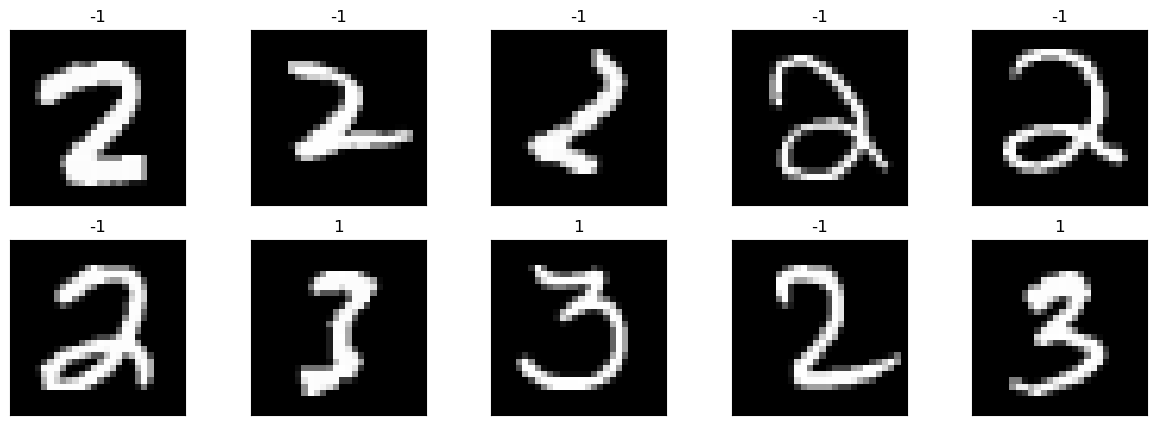

In [26]:
fig = plt.figure(figsize=(15, 5))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[idx].numpy()), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

### 2.5 Preprocess the samples and initialize $\mathbf{w}$ **(0.4 pts)**

The original algorithm starts from zero parameter vector, but actually we can use just randomly initialized vector; it will make it faster to converge

**Instructions**: Complete the missing lines of code and calculate the performance on test set

In [27]:
def prep_data(X_train):
    """
    Flatten, normalize and extra column for bias
    Args:
        X_train: np.array of shape (N, 28, 28)

    Returns:
        X: preprocessed data
    """
    # ========= YOUR CODE STARTS HERE ========= #
    N = len(X_train)
    train_flattened = X_train.reshape(N, -1)
    X = np.apply_along_axis(lambda x: x / 255, 1, train_flattened)
    X = np.append(X, np.ones((X.shape[0], 1)), 1)
    
    # ========== YOUR CODE ENDS HERE ========== #
    return X

def initialize_weight_vector(size):
    """
    Create random parameter vector
    Args:
        size: Number of elements

    Returns:
        W: np.array of shape (size)
    """
    # ========= YOUR CODE STARTS HERE ========= #
    return np.random.uniform(-1, 1, size)
    # ========== YOUR CODE ENDS HERE ========== #

def misclassified(X, y, W):
    """
    Calculate indices of missclasified points
    Args:
        X: np.array, training images
        y: np.array, training labels
        w: np.array, parameter vector

    Returns:
        M: np.array of shape (m) - indices of missclasified points, where m is a number of missclasified points
    """
    # ========= YOUR CODE STARTS HERE ========= #
    w_dot_X = np.dot(X, W)
    sign_w_dot_X = np.sign(w_dot_X)
    misclassified_mask = y != sign_w_dot_X
    misclass_indices = np.where(misclassified_mask)[0]
    
    return misclass_indices
    # ========== YOUR CODE ENDS HERE ========== #


X_train_flat_aug = prep_data(X_train)
W = initialize_weight_vector(X_train_flat_aug.shape[1])

### 2.6 Training loop **(0.5 pts)**
Here you need to complete the training loop of the PLA algorithm. Observe that recalculation the misclassified set (Step 3 of the PLA algorithm) is the most costly (as we need to iterate through the whole train set). To speed up the algorithm convergence, we will do the following:
-  determine the set $S$ of misclassified datapoints
-  for every $\mathbf{w}\in S$ that is still misclassified, update the vector $\mathbf{w}$
-  only after that recalculate the set $S$

In [28]:
def find_hyperplane(X, y, W):
    """
    Determines the coordinates of weight vector that produces separating hyperplane.
    Args:
        X: np.array, images
        y: np.array, labels
        w: np.array, parameter vector
    
    Returns:
        W: the final vector of weights for the separating hyperplane
    """
    
    for i in range(2000):
        misclass = misclassified(X, y, W)
        if len(misclass) == 0:
            print(f"Found hyperplane on step {i}!")
            break
    # ========= YOUR CODE STARTS HERE ========= #    
        else:
            misclass_X = X[misclass]
            misclass_y = y[misclass]
            update = np.sum(misclass_X * misclass_y[:, np.newaxis], axis=0)
            W = W + update   
    return W
    # ========== YOUR CODE ENDS HERE ========== #

In [29]:
X_train_flat_aug = prep_data(X_train)
W = initialize_weight_vector(X_train_flat_aug.shape[1])
hyperplane = find_hyperplane(X_train_flat_aug, y_train.numpy(), W)

Found hyperplane on step 451!


### 2.7 Evaluate performance of the linear classifier on the test set **(0.3 pts)**

Check your classifier on the test set. Think of possible metrics that characterize performance and comment on how good the classifier is

---
First and foremost, we'd like to count how many points are misclassified by our hyperplane (that is, what is the number of points that lie on incorrect side of the hyperplane after the algorithm terminates?). For this, we make use of `misclassified` function we defined above and simply calculate the length of an array it outputs, which will give us number of misclassified predictions from test subset.

In [30]:
X_test_flat_aug = prep_data(X_test)
W_test = initialize_weight_vector(X_test_flat_aug.shape[1])

In [31]:
hyperplane = find_hyperplane(X_test_flat_aug, y_test.numpy(), W_test)
misclassified_points = len(misclassified(X_test_flat_aug, y_test.numpy(), hyperplane))

print(f"Number of points misclassified by hyperplane: ", misclassified_points)

Found hyperplane on step 46!
Number of points misclassified by hyperplane:  0


We can see that it took 46 iterations (clearly, this number can vary) for our algorithm to correctly classify each of 605 points from the test subset. Taking into account that on each iteration it updated the weight vector, this is probably not the most efficient way to compute the hyperplane, but, on the other hand, it is a very accurate one because given that our data is linearly separable, our algorithm is guarateed to converge and output hyperplane that separates all points correctly.

In [32]:
from line_profiler import LineProfiler

In [33]:
lp = LineProfiler()
lp_wrapper = lp(find_hyperplane)
lp_wrapper(X_train_flat_aug, y_train.numpy(), W)
lp.print_stats(details=True, )

Found hyperplane on step 451!
Timer unit: 1e-09 s

Total time: 0.964072 s
File: /var/folders/69/8qfcbcxx27q9fwxnzjfx79f00000gn/T/ipykernel_5060/1109735884.py
Function: find_hyperplane at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def find_hyperplane(X, y, W):
     2                                               """
     3                                               Determines the coordinates of weight vector that produces separating hyperplane.
     4                                               Args:
     5                                                   X: np.array, images
     6                                                   y: np.array, labels
     7                                                   w: np.array, parameter vector
     8                                               
     9                                               Returns:
    10                                                  

Using `line_profiler` module, we asses the speed of our algorithm. As it turns out, in our case the most costly operation that took up 77.1% of running time is `misclassified()` function call, whereas operations required for updating the weight vector took fairly less (22.9% in total). From this, we may conclude that our speeding-up approach of updating the vector only after all the misclassified points are determined indeed made this process faster. But this also leads to more often calls to `misclassified` function which in turn calculates dot products between **all** datapoints and the weight vector, and so is also quite costly.

## 3. Conclusions **(0.3 pts)**

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment

---

Upon the completion of this assignent, we learned in detail about Perceptron Learning Algorithm (PLA) by prooving that: \
    $\hspace{5mm}$(1) it works by adjusting the angle between normal vector and misclassified point; \
    $\hspace{5mm}$(2) as number of iterations $k$ grows, the angle between $\mathbf{w}_k$ and $\mathbf{w}^\star$ decreases (that is, we get more and more accurate hyperplane) and \
    $\hspace{5mm}$(3) that an upper bound of growth of the vector is at most $kR^2$ ensuring that the algorithm will converge in a finite number of steps. 
    
After that, we successfully completed the implementation of PLA and tested it on real-world data. Namely, we developed an algorithm that pre-processes hand-written images data and makes it much more manageble. Then we wrote two functions: `initialize_weight_vector` and `misclassified` that are essentially a backbone of the algorithm. Finally, `find_hyperplane` was implemented and used to update our weight vector of the hyperplane. This last function is probably the most important one in terms of linkage with underlying theoretical concepts, as it makes use of nice properties of dot products and orthogonality which are indeed fundamental for linear classifier ML algorithms like PLA as they allow us to update our hyperplane in accordance with location of particular misclassified points relative to hyperplane. And this is what PLA is essentially about.

---